## Bayesi becslés érmedobálásra

In [1]:
%pylab inline
from scipy.special import loggamma

Populating the interactive namespace from numpy and matplotlib


In [2]:
def triplot(theta,**kwargs):
    L,i = len(kwargs),0
    f,ax = subplots(1,L)
    f.set_size_inches(L*5,5)
    for t,p in kwargs.items():
        ax[i].plot(theta,np.exp(p))
        ax[i].set_title(t)
        i += 1

In [3]:
θ   = 0.4
num = 100
X   = np.random.choice([1,0],p=[θ,1-θ],size=num)

F = sum(X)
I = num-F

print("Fej = {}, Írás = {}".format(F,I))

Fej = 44, Írás = 56


ML: θ = 0.44


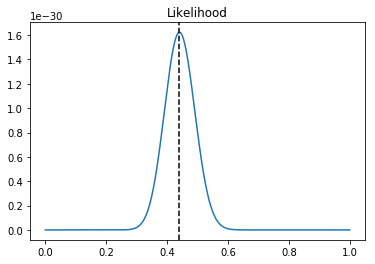

In [4]:
θ = np.arange(1e-12, 1.0, 0.001)

neg_log_likelihood = -F*np.log(θ) - I*np.log(1-θ)
maximum_likelihood = F/(F+I)

plot(θ,np.exp(-neg_log_likelihood))
axvline(x=maximum_likelihood,ls='--',c='black')
title("Likelihood")

print("ML: θ = {}".format(maximum_likelihood))

In [5]:
def LB(a,b,stirling=False):
    if stirling:
        return (a+b)*np.log(a+b) - a*np.log(a) - b*np.log(b)
    else:
        return np.real(loggamma(a+b+2) - loggamma(a+1) - loggamma(b+1))
    
print("Stirling-formula: {}\nScipy: {}".format(LB(F,I,True),LB(F,I,False)))

Stirling-formula: 68.5929800252373
Scipy: 70.68442778388498


MAP: θ ~ 0.354


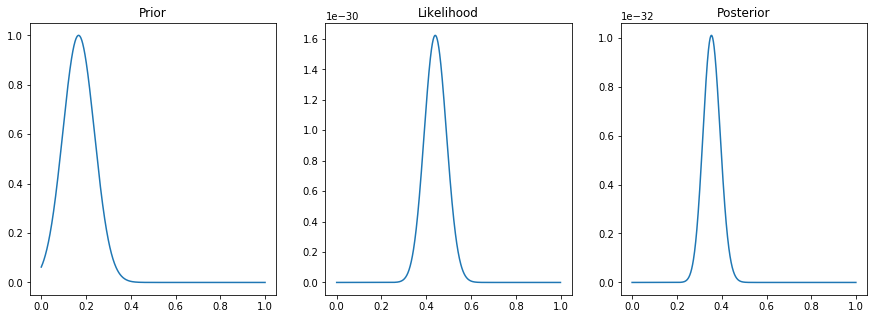

In [6]:
mu = 0.1666
s2 = 0.005
log_prior_unnorm     = -(θ-mu)**2/(s2*2)
log_posterior_unnorm = -neg_log_likelihood + log_prior_unnorm
maximum_a_posteriori = np.argmax(log_posterior_unnorm)/len(θ)

triplot(θ,Prior=log_prior_unnorm,Likelihood=-neg_log_likelihood,Posterior=log_posterior_unnorm)

print("MAP: θ ~ {}".format(maximum_a_posteriori))

## Konjugált prior

MAP: theta = 0.4090909090909091


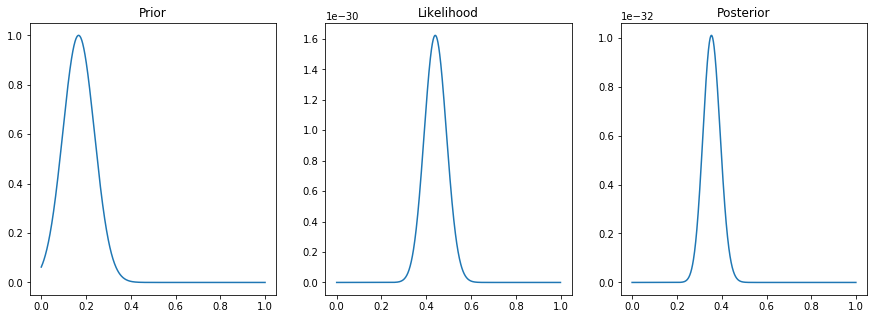

In [7]:
a = 2
b = 10
log_prior            = LB(a-1,b-1) + (a-1)*np.log(θ) + (b-1)*np.log(1-θ)
log_posterior_unnorm = -neg_log_likelihood + log_prior_unnorm
maximum_a_posteriori = (a+F-1)/(F+I+a+b-2)

triplot(θ,Prior=log_prior_unnorm,Likelihood=-neg_log_likelihood,Posterior=log_posterior_unnorm)

print("MAP: theta = {}".format(maximum_a_posteriori))

## Teljes Bayesi következtetés

In [8]:
a = 2
b = 10

full_bayes = (a+F)/(a+F+b+I)
print("Full Bayes: {}".format(full_bayes))

Full Bayes: 0.4107142857142857


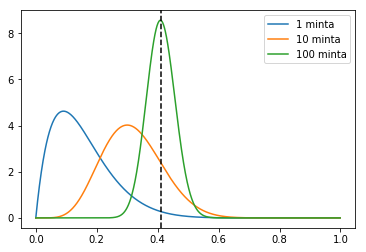

In [9]:
for r in range(int(np.log10(F+I))+1):
    F2 = sum(X[0:(10**r)])
    I2 = 10**r-F2
    a2 = a+F2
    b2 = b+I2
    log_posterior = LB(a2-1,b2-1) + (a2-1)*np.log(θ) + (b2-1)*np.log(1-θ)
    
    plt.plot(θ,np.exp(log_posterior),label="{} minta".format(10**r))
plt.axvline(x=full_bayes,linestyle="dashed",color="black")
plt.legend();